In [192]:
import numpy as np
import cv2

In [193]:
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

In [194]:
import caffe

In [195]:
import sys
caffe_root = '/home/student/Documents/PSPNet'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

In [196]:
caffe.set_mode_cpu()

In [197]:
model_def = '/home/student/Documents/PSPNet/evaluation/prototxt/pspnet101_cityscapes_713.prototxt'
model_weights = '/home/student/Documents/PSPNet/caffemodel/pspnet101_cityscapes.caffemodel'
# model_def = caffe_root + 'models/DeepLab-LargeFOV/test.prototxt'
# model_weights = caffe_root + 'models/DeepLab-LargeFOV/train2_iter_8000.caffemodel'

In [198]:
net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [9]:
mu = np.load('/home/student/Documents/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')
# mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [10]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR


In [11]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(1,        # batch size
                          3,         # 3-channel (BGR) images
                          713, 713)  # image size is 227x227

In [174]:
#image = caffe.io.load_image('/home/sumukh/Documents/Living_Indicator/img/file58.png')
# image = caffe.io.load_image('/home/sumukh/Desktop/BMW.jpg')
image = caffe.io.load_image('/home/student/Documents/Living_Indicator/img/file44.png')

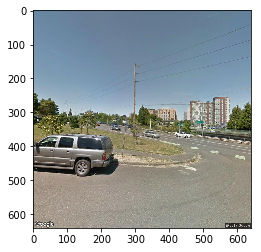

In [175]:
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [176]:
net.blobs['data'].data[...] = transformed_image

In [177]:
output = net.forward()

In [29]:
# for each layer, show the output shape
for layer_name, param in net.params.iteritems():
    # print layer_name + '\t' + str(param[0].data.shape)+ ' ' + str(param[1].data.shape)
    print layer_name + '\t' + str(param[0].data.shape)+ ' '   

conv1_1_3x3_s2	(64, 3, 3, 3) 
conv1_1_3x3_s2/bn	(1, 64, 1, 1) 
conv1_2_3x3	(64, 64, 3, 3) 
conv1_2_3x3/bn	(1, 64, 1, 1) 
conv1_3_3x3	(128, 64, 3, 3) 
conv1_3_3x3/bn	(1, 128, 1, 1) 
conv2_1_1x1_reduce	(64, 128, 1, 1) 
conv2_1_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_1_3x3	(64, 64, 3, 3) 
conv2_1_3x3/bn	(1, 64, 1, 1) 
conv2_1_1x1_increase	(256, 64, 1, 1) 
conv2_1_1x1_increase/bn	(1, 256, 1, 1) 
conv2_1_1x1_proj	(256, 128, 1, 1) 
conv2_1_1x1_proj/bn	(1, 256, 1, 1) 
conv2_2_1x1_reduce	(64, 256, 1, 1) 
conv2_2_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_2_3x3	(64, 64, 3, 3) 
conv2_2_3x3/bn	(1, 64, 1, 1) 
conv2_2_1x1_increase	(256, 64, 1, 1) 
conv2_2_1x1_increase/bn	(1, 256, 1, 1) 
conv2_3_1x1_reduce	(64, 256, 1, 1) 
conv2_3_1x1_reduce/bn	(1, 64, 1, 1) 
conv2_3_3x3	(64, 64, 3, 3) 
conv2_3_3x3/bn	(1, 64, 1, 1) 
conv2_3_1x1_increase	(256, 64, 1, 1) 
conv2_3_1x1_increase/bn	(1, 256, 1, 1) 
conv3_1_1x1_reduce	(128, 256, 1, 1) 
conv3_1_1x1_reduce/bn	(1, 128, 1, 1) 
conv3_1_3x3	(128, 128, 3, 3) 
conv3_1_3x3/bn	(

In [105]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 713, 713)
conv1_1_3x3_s2	(1, 64, 357, 357)
conv1_2_3x3	(1, 64, 357, 357)
conv1_3_3x3	(1, 128, 357, 357)
pool1_3x3_s2	(1, 128, 179, 179)
pool1_3x3_s2_pool1_3x3_s2_0_split_0	(1, 128, 179, 179)
pool1_3x3_s2_pool1_3x3_s2_0_split_1	(1, 128, 179, 179)
conv2_1_1x1_reduce	(1, 64, 179, 179)
conv2_1_3x3	(1, 64, 179, 179)
conv2_1_1x1_increase	(1, 256, 179, 179)
conv2_1_1x1_proj	(1, 256, 179, 179)
conv2_1	(1, 256, 179, 179)
conv2_1_conv2_1/relu_0_split_0	(1, 256, 179, 179)
conv2_1_conv2_1/relu_0_split_1	(1, 256, 179, 179)
conv2_2_1x1_reduce	(1, 64, 179, 179)
conv2_2_3x3	(1, 64, 179, 179)
conv2_2_1x1_increase	(1, 256, 179, 179)
conv2_2	(1, 256, 179, 179)
conv2_2_conv2_2/relu_0_split_0	(1, 256, 179, 179)
conv2_2_conv2_2/relu_0_split_1	(1, 256, 179, 179)
conv2_3_1x1_reduce	(1, 64, 179, 179)
conv2_3_3x3	(1, 64, 179, 179)
conv2_3_1x1_increase	(1, 256, 179, 179)
conv2_3	(1, 256, 179, 179)
conv2_3_conv2_3/relu_0_split_0	(1, 256, 179, 179)
conv2_3_conv2_3/relu_0_split_1	(1, 256, 179, 179)
conv

In [20]:
# print (net.blobs['fc8_voc12'].data[0,1].shape)
print (len(net.blobs['fc8_voc12'].data.flatten()))

18900


In [150]:
print(net.blobs['conv6_interp'].data[0,4].shape)
print(net.blobs['conv6_interp'].data[0,9])

(713, 713)
[[-2.24593925 -2.25367546 -2.26141191 ..., -1.54700148 -1.53823221
  -1.52946293]
 [-2.29608035 -2.30546498 -2.31484962 ..., -1.56067419 -1.55248153
  -1.54428875]
 [-2.34622169 -2.35725451 -2.36828756 ..., -1.57434702 -1.56673074
  -1.55911469]
 ..., 
 [-0.48331189 -0.47646421 -0.46961653 ...,  4.46427727  4.42944336
   4.3946085 ]
 [-0.46243298 -0.44590834 -0.42938372 ...,  4.39514112  4.34894848
   4.30275536]
 [-0.44155407 -0.41535249 -0.38915092 ...,  4.32600498  4.26845407
   4.21090269]]


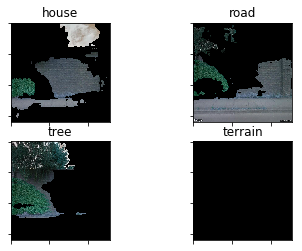

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline


house_img = "/home/student/Sumukh/Results/House/test_house309.png"
road_img = "/home/student/Sumukh/Results/Road/test_road309.png"
tree_img = "/home/student/Sumukh/Results/Trees/test_tree309.png"
terrain_img = "/home/student/Sumukh/Results/Terrain/test_terrain309.png"

img = "/home/student/Sumukh/Living_Indicator/img/file309.png"

img1 = cv2.imread(img)

house = cv2.imread(house_img)
road = cv2.imread(road_img)
tree = cv2.imread(tree_img)
terrain = cv2.imread(terrain_img)
    
pts1 = np.float32([[144, 60], [144, 425], [513, 60], [513, 425]])
pts2 = np.float32([[0, 0], [0, 640], [640, 0], [640, 640]])

M = cv2.getPerspectiveTransform(pts1, pts2)

house= cv2.warpPerspective(house, M, (640, 640))
house = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
house_ret, house_mask = cv2.threshold(house, 30, 255, cv2.THRESH_BINARY)
house_bg = cv2.bitwise_and(img1, img1, mask = house_mask)

road= cv2.warpPerspective(road, M, (640, 640))
road = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)
road_ret, road_mask = cv2.threshold(road, 30, 255, cv2.THRESH_BINARY)
road_bg = cv2.bitwise_and(img1, img1, mask = road_mask)

tree= cv2.warpPerspective(tree, M, (640, 640))
tree = cv2.cvtColor(tree, cv2.COLOR_BGR2GRAY)
tree_ret, tree_mask = cv2.threshold(tree, 30, 255, cv2.THRESH_BINARY)
tree_bg = cv2.bitwise_and(img1, img1, mask = tree_mask)

terrain= cv2.warpPerspective(terrain, M, (640, 640))
terrain = cv2.cvtColor(terrain, cv2.COLOR_BGR2GRAY)
terrain_ret, terrain_mask = cv2.threshold(terrain, 30, 255, cv2.THRESH_BINARY)
terrain_bg = cv2.bitwise_and(img1, img1, mask = terrain_mask)

fig = plt.figure()
a=fig.add_subplot(2,2,1)
plt.imshow(house_bg)
a.set_title('house')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,2)
plt.imshow(road_bg)
a.set_title('road')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,3)
plt.imshow(tree_bg)
a.set_title('tree')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)
a=fig.add_subplot(2,2,4)
plt.imshow(terrain_bg)
a.set_title('terrain')
plt.setp(a.get_xticklabels(), visible=False)
plt.setp(a.get_yticklabels(), visible=False)

plt.savefig('/home/student/Sumukh/forfiles/Seg_309.png')
plt.show()


#plt.savefig('/home/student/Sumukh/forfiles/Seg_6.png')